In [14]:
# !pip install rutermextract

# Get review data

In [212]:
from rutermextract import TermExtractor
term_extractor = TermExtractor()

In [213]:
import pandas as pd
import os
from tqdm import tqdm

In [214]:
DATA_PATH = '../Resources'
REVIEW_COL = 'Review'
TITLE_COL = 'Title'

In [215]:
data = pd.read_csv(os.path.join(DATA_PATH,'1_clean_review_data','cleanAppStore.csv'))

In [216]:
data.head()

,Date,AppID,AppName,Country,Version,Author,Rating,Title,Review,Reply Date,Developer Reply,Likes,Dislikes,Link,Permalink,AF Link
0,2020-07-29 06:53:05,492224193,Сбербанк Онлайн,ru,11.1.0,где кекс ефем,5,Сбербанк онлайн,Не скачивается стала обновлять и зависло прило...,NaN,NaN,0.0,0.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/445/review/34133693?s=p2,https://watch.appfollow.io/apps/banks/reviews/...
1,2020-07-29 06:28:50,492224193,Сбербанк Онлайн,ru,11.1.0,Юлия9086428045,3,.,Приложение не открывается после обновления!!!!...,NaN,NaN,0.0,0.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/445/review/34133692?s=p2,https://watch.appfollow.io/apps/banks/reviews/...
2,2020-07-29 05:23:33,492224193,Сбербанк Онлайн,ru,11.1.0,Екатерина 79,3,Касательно работы обновлённой версии,"Добрый день, после последнего обновления пропа...",NaN,NaN,0.0,0.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/445/review/34133691?s=p2,https://watch.appfollow.io/apps/banks/reviews/...
3,2020-07-29 03:06:06,492224193,Сбербанк Онлайн,ru,11.1.0,!ава!,1,.,Не могу скачать так как требует подключения Wi-fi,NaN,NaN,0.0,0.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/445/review/34133690?s=p2,https://watch.appfollow.io/apps/banks/reviews/...
4,2020-07-29 01:47:35,492224193,Сбербанк Онлайн,ru,11.1.0,achjfdhj,1,ApplePay,Почему то не могу оплатить при минусе на балан...,NaN,NaN,0.0,0.0,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/445/review/34133614?s=p2,https://watch.appfollow.io/apps/banks/reviews/...


In [217]:
data.shape

(11584, 16)

# Extract keywords from reviews

In [29]:
keywords_dict = {}
keywords = []

In [30]:
for text in tqdm(data[REVIEW_COL]):
    keyword_dict = {}
    for term in term_extractor(text):
        keyword_dict[term.normalized] = term.count
        keywords.append(term.normalized)
    keywords_dict[text] = keyword_dict

100%|██████████| 11584/11584 [00:42<00:00, 271.80it/s]


In [55]:
len(set(keywords))

16139

# Extract keywords from reviews' titles

In [68]:
keywords_dict_title = {}
keywords_title = []

In [70]:
for text in tqdm(data[TITLE_COL]):
    keyword_dict = {}
    for term in term_extractor(text):
        keyword_dict[term.normalized] = term.count
        keywords_title.append(term.normalized)
    keywords_dict_title[text] = keyword_dict

100%|██████████| 11584/11584 [00:05<00:00, 2229.34it/s]


In [71]:
len(set(keywords_title))

3258

# Count most common keywords

In [49]:
import seaborn as sns

In [72]:
from collections import Counter,OrderedDict
counter = Counter(keywords)
keywords_occur = OrderedDict(sorted(counter.items(), key=lambda kv: kv[1], reverse=True))
counter_title = Counter(keywords_title)
keywords_occur_title = OrderedDict(sorted(counter_title.items(), key=lambda kv: kv[1], reverse=True))

In [73]:
keywords_occur_df = pd.DataFrame(columns = ['keyword','occurance'])
keywords_occur_df_title = pd.DataFrame(columns = ['keyword','occurance'])

In [74]:
keywords_occur_df['keyword'] = keywords_occur.keys()
keywords_occur_df['occurance'] = keywords_occur.values()

keywords_occur_df_title['keyword'] = keywords_occur_title.keys()
keywords_occur_df_title['occurance'] = keywords_occur_title.values()

<AxesSubplot:xlabel='occurance'>

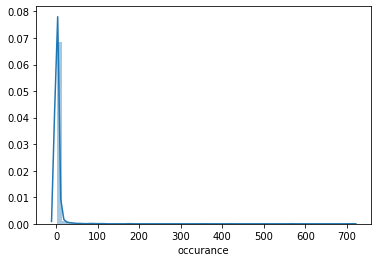

In [75]:
# distplot of all keywords occurances
sns.distplot(keywords_occur_df_title['occurance'])

/Users/Alisa.Alenicheva/anaconda3/envs/sbercode/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='occurance'>

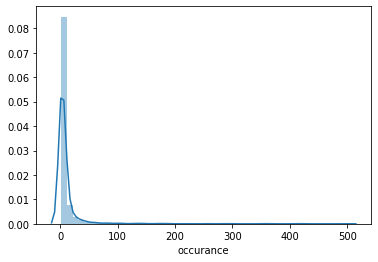

In [63]:
# distplot of all keywords occurances
sns.distplot(keywords_occur_df[keywords_occur_df['occurance']>1][keywords_occur_df['occurance']<500]['occurance'])

In [65]:
len(keywords_occur_df[keywords_occur_df['occurance']==1]['keyword'].values)

12307

In [67]:
keywords_occur_df[keywords_occur_df['occurance']==1]['keyword'].values

array(['сканирование лица', 'подключение wi-fi', 'mastercard', ...,
       'телефон денег', 'менеджеры рукожопов',
       'возможность выбора способа начисления'], dtype=object)

In [218]:
keywords_occur_df_title.to_excel(os.path.join(DATA_PATH,'2_keywords_for_teams_data','keywords_title.xls'))
keywords_occur_df.to_excel(os.path.join(DATA_PATH,'2_keywords_for_teams_data','keywords.xls'))

# Distribute keywords over teams

In [219]:
team_names = list(set([x.strip('\r\n') for x in open(os.path.join(DATA_PATH,'2_keywords_for_teams_data','team_names.txt'))]))

In [194]:
team_names

['store-n-sales',
 'Редактируемый профиль клиента',
 'DDA Profile',
 'Дебетовые карты в мобильном приложении',
 'История операций',
 'iOS Release Engineer',
 'PFMMPLACE',
 'ЕФС. Страхование',
 'PFM Бюджет',
 'Data Driven App',
 'ВС.МП вклады',
 'Госуслуги',
 'Global Navigation',
 'Цифровой Кредит',
 'DBP.Витрины продаж',
 'Integration Platform',
 'Мессенджер',
 'ПДВ в Digital',
 'iOS Platform',
 'ЕФС.Автоплатежи',
 'Карта в телефоне',
 'Плановый и досрочный перевыпуск дебетовых карт',
 'ЕФС. Брокеридж. Мобайл',
 'Автопереводы',
 'Комиссионные продукты',
 'DBP.Подарки',
 'Mobile Online POS (Розничный кредит)',
 'Развитие лояльности в МП СБОЛ',
 'PUSH IOS',
 'ЕФС Выписки и справки. Mobile',
 'Самозанятые',
 'Digital Сбербанк Премьер',
 'Sberbank ID B2C',
 'PFM',
 'ЕФС.Платежи МП',
 'Телеком',
 'Платежи. Штрафы',
 'Текстовый чат',
 '[ЕФС] Б.УБ.СБОЛ.Баллонг',
 'Краудфандинг',
 '[ЕФС].Кредитные карты.Космонавты (Доп. услуги и сервисы)',
 'СБОЛ. Классические переводы']

In [139]:
team_names_keywords = {}

In [140]:
team_names_keywords['iOS Platform'] = 'Touch ID,Face ID,Виджет Избранное,Геокарты,Адресная книга,Механизм отправки событий аналитики,Аутентификация,Регистрация,Авторизация,карта,темная тема,вход,виджет,обновление,версия,ios,ipad,вылет,лагает,тормозит,айфон,запуск,загрузка,отпечаток,авторизаци,зависание,обнова,глюк,звук,фейс,долгая загрузка,быстрый вход,отображение,iphone xr,фэйс,iphone 6,пароль,ввод пароля,iphone X,черная тема,ошибка приложения,iphone xs,ipad pr'.lower().split(',')

In [141]:
team_names_keywords['Global Navigation'] = 'Прелогин,приветствие,экран входа,экран ввода пинкода,экран регистрации,Курсы валют,Туториал,оферта,политика конфиденциальности,демо-режим,вход,виджет,интерфейс,загрузка,авторизация,вкладка,дизайн,заставка,кнопка,главный экран,оформление,меню,экран,шрифт,анимация,окно'.lower().split(',')


In [142]:
team_names_keywords['DDA Profile'] = 'профиль клиента,личный кабинет,пароль'.lower().split(',')

In [143]:
team_names_keywords['PFM'] = 'цели,копилки'.lower().split(',')

In [144]:
team_names_keywords['PFMMPLACE'] = 'инвестиции'.lower().split(',')

In [145]:
team_names_keywords['PUSH IOS'] = 'пуш-уведомления,пуш уведомления,Уведомление,оповещение,реклама,спам,звук,эксклюзивные звуки,пуш'.lower().split(',')

In [146]:
team_names_keywords['DBP.Витрины продаж'] = 'предложения банка,реклама,спам'.lower().split(',')

In [147]:
team_names_keywords['Госуслуги'] = 'госуслуги'.lower().split(',')

In [148]:
team_names_keywords['iOS Release Engineer'] = 'Безопасность,Размер сборки,оферта,политика конфиденциальности,Обновление,версия,новая версия,обнова,оптимизация,размер приложения,конфиденциальность'.lower().split(',')

In [149]:
team_names_keywords['Мессенджер'] = 'диалоги,смс,диалог,связь,спам,бот,смс-уведомления,смс-оповещения'.lower().split(',')

In [150]:
team_names_keywords['store-n-sales'] = 'каталог'.lower().split(',')

In [151]:
team_names_keywords['Integration Platform'] = 'лимиты,справочники'.lower().split(',')

In [152]:
team_names_keywords['Data Driven App'] = 'умный поиск'.lower().split(',')

In [153]:
team_names_keywords['Краудфандинг'] = 'Краудфандинг,Краудгифтинг'.lower().split(',')

In [154]:
team_names_keywords['DBP.Подарки'] = 'Подарки'.lower().split(',')

In [155]:
team_names_keywords['Sberbank ID B2C'] = 'Оплата товаров из других приложений и интернет-магазинов,комиссия,уведомление,товар,интернет-магазин'.lower().split(',')

In [156]:
team_names_keywords['История операций'] = 'История операций,лента событий'.lower().split(',')

In [157]:
team_names_keywords['Редактируемый профиль клиента'] = 'Личный кабинет,фото,Персональные данные клиента,паспортные данные,инн,снилс'.lower().split(',')

In [158]:
team_names_keywords['ЕФС Выписки и справки. Mobile'] = 'выписка,справка,отчет,квитанция,счет'.lower().split(',')

In [159]:
team_names_keywords['ЕФС.Платежи МП'] = 'оплата услуг,мобильная связь,интернет,оплата по ШК,оплата по QR,оплата по штрихкоду,изменение статуса,печать чека,комиссия,шаблон,деньги,мир,оповещение,платеж,реквизиты,оплата жкх,быстрые платежи,номер телефона,чеки,денежные средства,штрих,квитанция,штрих-код,qr-код,жкх'.lower().split(',')

In [160]:
team_names_keywords['Платежи. Штрафы'] = 'оплата штрафов,поиск штрафов,бюджетные платежи,налоги,полшлины,патенты,комиссия,уведомление,деньги,шаблон,график платежей,реквизиты,гибдд,денежные средства'.lower().split(',')

In [161]:
team_names_keywords['ПДВ в Digital'] = 'востребование,перевод до востребования,перевод'.lower().split(',')

In [162]:
team_names_keywords['СБОЛ. Классические переводы'] = 'p2p,перевод,клиент сбербанка,другой банк,перевод между счетами,перевод на счет,комиссия,уведомление,карта,перевод,смс,шаблоны,мир,деньги,пополнение,номер телефона,платные переводы'.lower().split(',')

In [163]:
team_names_keywords['ЕФС.Автоплатежи'] = 'автоплатеж, умные счета, счет на оплату,комиссия,уведомление,деньги,график платежей,ипотека,реквизиты,оплата жкх,быстрые платежи, коммунальные платежи,списание'.lower().split(',')

In [164]:
team_names_keywords['Автопереводы'] = 'автоперевод,перевод,списание'.lower().split(',')

In [166]:
team_names_keywords['Digital Сбербанк Премьер'] = 'Клиентский менеджер, менеджер, клиент'.lower().split(',')

In [167]:
team_names_keywords['Развитие лояльности в МП СБОЛ'] = 'программа лояльности,лояльность,бонусы,баллы,спасибо'.lower().split(',')

In [168]:
team_names_keywords['Дебетовые карты в мобильном приложении'] = 'дебет,дебетовая карта,карта,мир,карточка,wallet,сортировка карт,выбор карты,реквизиты карты,номер карты, другая карта'.lower().split(',')

In [169]:
team_names_keywords['Карта в телефоне'] = 'Apple Pay,apple watch,watch'.lower().split(',')

In [171]:
team_names_keywords['Плановый и досрочный перевыпуск дебетовых карт'] = 'заблокированная карта,выпуск,выпуск карт,блокировка карт,перевыпуск карт,карта,мир,счет,карточка'.lower().split(',')

In [173]:
team_names_keywords['Самозанятые'] = 'Самозанятые,ип,оформить ип'.lower().split(',')

In [175]:
team_names_keywords['Цифровой Кредит'] = 'Ипотека,лимит,проценты,погашение,досрочное погашение,оплата кредита,срок,уменьшение срока,досрочный платеж,карта'.lower().split(',')

In [177]:
team_names_keywords['ВС.МП вклады'] = 'Открытие вклада,вклад,счет вклада,счет,баланс'.lower().split(',')

In [178]:
team_names_keywords['Комиссионные продукты'] = 'ОМС,сейф'.lower().split(',')

In [179]:
team_names_keywords['PFM Бюджет'] = 'анализ расходов,аналитика,бюджет,Баланс,анализ финансов,расходы,финансы'.lower().split(',')

In [181]:
team_names_keywords['Mobile Online POS (Розничный кредит)'] = 'ОМС,Мобильное интернет кредитование,Ипотека,лимит,проценты,погашение,досрочное погашение,оплата кредита,срок,уменьшение срока'.lower().split(',')

In [182]:
team_names_keywords['Текстовый чат'] = 'Чат с оператором Сбербанка,оператор,чат,обратная связь,фидбек,звонок в банк,смс,уведомление,диалог,связь,поддержка,обслуживание,справка,помощь,help,бот,оператор,sos'.lower().split(',')

In [185]:
team_names_keywords['[ЕФС].Кредитные карты.Космонавты (Доп. услуги и сервисы)'] = 'Автопогашение по Кредитной карте,автопогашение,кредит,уведомление,карта,счет,баланс,карточка,лимит,проценты,кредитка,досрочное погашение,оплата кредита,задолженность'.lower().split(',')

In [186]:
team_names_keywords['ЕФС. Брокеридж. Мобайл'] = 'Брокерское обслуживание,брокер'.lower().split(',')

In [187]:
team_names_keywords['[ЕФС] Б.УБ.СБОЛ.Баллонг'] = 'инвестиции,благосостояние'.lower().split(',')

In [188]:
team_names_keywords['ЕФС. Страхование'] = 'Страхование,страховка,постпродажа,обслуживание'.lower().split(',')

In [190]:
team_names_keywords['Телеком'] = 'Сбербанк-Телеком,телеком,виджет'.lower().split(',')

In [206]:
collaboration = ['iOS Platform','Global Navigation','iOS Release Engineer','Карта в телефоне'\
                'DDA Profile', 'Редактируемый профиль клиента'\
                'Sberbank ID B2C','ЕФС.Платежи МП','Платежи. Штрафы','ПДВ в Digital','СБОЛ. Классические переводы','ЕФС.Автоплатежи','Автопереводы'\
                '[ЕФС] Б.УБ.СБОЛ.Баллонг','PFMMPLACE',\
                'Цифровой Кредит', 'Mobile Online POS (Розничный кредит)','[ЕФС].Кредитные карты.Космонавты (Доп. услуги и сервисы)',\
                'Текстовый чат','Мессенджер',\
                'store-n-sales','Integration Platform','Data Driven App','Краудфандинг','DBP.Подарки','Digital Сбербанк Премьер','Комиссионные продукты','Телеком',\
                'Дебетовые карты в мобильном приложении','Плановый и досрочный перевыпуск дебетовых карт'
                ]

In [204]:
final_keywords = {}
final_keywords['интерфейс приложения'] = list(set(team_names_keywords['iOS Platform']+\
                                         team_names_keywords['Global Navigation']+\
                                         team_names_keywords['iOS Release Engineer']+\
                                         team_names_keywords['Карта в телефоне']))
final_keywords['данные клиента'] = list(set(team_names_keywords['DDA Profile']+\
                                           team_names_keywords['Редактируемый профиль клиента'])) 
final_keywords['платежи'] = list(set(team_names_keywords['Sberbank ID B2C']+\
                                    team_names_keywords['ЕФС.Платежи МП']+\
                                    team_names_keywords['Платежи. Штрафы']+\
                                    team_names_keywords['ПДВ в Digital']+\
                                    team_names_keywords['СБОЛ. Классические переводы']+\
                                    team_names_keywords['ЕФС.Автоплатежи']+\
                                    team_names_keywords['Автопереводы']))
final_keywords['инвестиции'] = list(set(team_names_keywords['[ЕФС] Б.УБ.СБОЛ.Баллонг']+\
                                       team_names_keywords['PFMMPLACE']))
final_keywords['кредит'] = list(set(team_names_keywords['Цифровой Кредит']+\
                                   team_names_keywords['Mobile Online POS (Розничный кредит)']+\
                                   team_names_keywords['[ЕФС].Кредитные карты.Космонавты (Доп. услуги и сервисы)']))
final_keywords['общение'] = list(set(team_names_keywords['Текстовый чат']+\
                                    team_names_keywords['Мессенджер']))
final_keywords['фигня'] = list(set(team_names_keywords['store-n-sales']+\
                                  team_names_keywords['Integration Platform']+\
                                  team_names_keywords['Data Driven App']+\
                                  team_names_keywords['Краудфандинг']+\
                                  team_names_keywords['DBP.Подарки']+\
                                  team_names_keywords['Digital Сбербанк Премьер']+\
                                  team_names_keywords['Комиссионные продукты']+\
                                  team_names_keywords['Телеком']))
final_keywords['операциии с картами'] = list(set(team_names_keywords['Дебетовые карты в мобильном приложении']+\
                                                team_names_keywords['Плановый и досрочный перевыпуск дебетовых карт']
                                                ))

In [207]:
for key in team_names_keywords.keys():
    if key not in collaboration:
        final_keywords[key] = team_names_keywords[key]

In [211]:
import json

with open(os.path.join(DATA_PATH,'2_keywords_for_teams_data','team_keywords.json'),'w') as f:
    json.dump(team_names_keywords, f,ensure_ascii=False,)

with open(os.path.join(DATA_PATH,'2_keywords_for_teams_data','grouped_team_keywords.json'),'w') as f:
    json.dump(final_keywords, f,ensure_ascii=False,)